In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import random
random.seed(42)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving price.csv to price.csv


In [ ]:
from io import BytesIO

In [ ]:
dataset = pd.read_csv(BytesIO(uploaded['price.csv']))
dataset = dataset.dropna()

In [ ]:
dataset.drop(['symbol'], axis = 1)

,date,open,close,low,high,volume
0,2016-01-05,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...
851259,2016-12-30,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,44.730000,45.450001,44.410000,45.590000,1380900.0


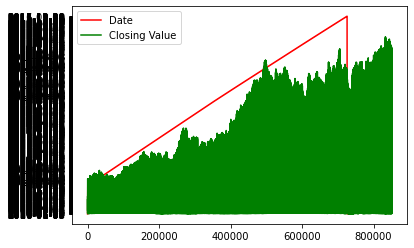

In [ ]:
import matplotlib.pyplot as plt
y_label=np.array(dataset['close'])
x_label=np.array(dataset['date'])
plt.plot(x_label, color='r', label='Date')
plt.plot(y_label, color='g', label='Closing Value')
plt.legend()
plt.show()

In [ ]:
dataset['H-L'] = dataset['high'] - dataset['low']
dataset['O-C'] = dataset['close'] - dataset['open']
dataset['3day MA'] = dataset['close'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['close'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['close'].shift(1).rolling(window = 30).mean()
dataset['Std_dev']= dataset['close'].rolling(5).std()
dataset['Price_Rise'] = np.where(dataset['close'].shift(-1) > dataset['close'], 1, 0)

In [ ]:
dataset = dataset.dropna()

In [ ]:
X = dataset.iloc[:, 7:-1]
y = dataset.iloc[:, -1]
X

,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
30,3.269997,0.479995,109.949997,111.008999,112.777666,2.073025
31,5.120003,-1.040001,111.203331,110.763998,112.303000,1.485878
32,2.220001,1.680000,111.056666,110.225999,111.981333,1.036451
33,1.450005,-0.480004,111.656667,110.127999,111.917666,0.987193
34,2.669998,0.790001,111.753334,110.200999,111.760000,0.966555
...,...,...,...,...,...,...
851259,1.080002,-0.110001,50.506667,58.246999,65.910000,34.653861
851260,0.620002,-0.029999,68.399999,54.977000,66.644334,26.118796
851261,0.470002,-0.110000,69.856667,55.211000,65.543334,25.793282
851262,1.180000,0.720001,66.589999,56.838000,64.872000,24.514858


In [ ]:
split = int(len(dataset)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

In [ ]:
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

In [ ]:
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

In [ ]:
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

In [ ]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer ="adam" , loss = 'mean_squared_error', metrics = ['accuracy'])

In [ ]:
history=classifier.fit(X, y, validation_split=0.33, epochs=10, batch_size=10)

Epoch 1/100
57033/57033 [==============================] - 135s 2ms/step - loss: 0.2015 - accuracy: 0.6831 - val_loss: 0.2003 - val_accuracy: 0.6906
Epoch 2/100
57033/57033 [==============================] - 143s 3ms/step - loss: 0.1942 - accuracy: 0.6975 - val_loss: 0.1980 - val_accuracy: 0.6964
Epoch 3/100
57033/57033 [==============================] - 131s 2ms/step - loss: 0.1901 - accuracy: 0.7044 - val_loss: 0.1927 - val_accuracy: 0.7091
Epoch 4/100
57033/57033 [==============================] - 131s 2ms/step - loss: 0.1866 - accuracy: 0.7108 - val_loss: 0.2065 - val_accuracy: 0.6842
Epoch 5/100
57033/57033 [==============================] - 141s 2ms/step - loss: 0.1830 - accuracy: 0.7175 - val_loss: 0.2078 - val_accuracy: 0.6839
Epoch 6/100
57033/57033 [==============================] - 130s 2ms/step - loss: 0.1802 - accuracy: 0.7234 - val_loss: 0.2157 - val_accuracy: 0.6799
Epoch 7/100
57033/57033 [==============================] - 130s 2ms/step - loss: 0.1779 - accuracy: 0.7279

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# list all data in history
import matplotlib.pyplot as plt
print(his.history.keys())
# summarize history for accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


NameError: ignored

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.49473412159979324
Mean Squared Error: 0.49473412159979324
Root Mean Squared Error: 0.70337338704261


In [ ]:
dataset['y_pred'] = np.NaN
val=(len(dataset) - len(y_pred))
val

680987

In [ ]:
dataset.iloc[val:,-1:] = y_pred
trade_dataset = dataset.dropna()

In [ ]:
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['close']/trade_dataset['close'].shift(1))
trade_dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,symbol,open,close,low,high,volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,y_pred,Tomorrows Returns
681017,2015-08-25,TXN,46.020000,43.520000,43.490002,46.320000,14458300.0,2.829998,-2.500000,67.000001,73.208001,67.660667,21.507683,0,True,NaN
681018,2015-08-25,TXT,39.430000,37.000000,36.950001,40.630001,3079700.0,3.680000,-2.430000,51.946668,71.998001,67.856667,22.081914,1,True,-0.162303
681019,2015-08-25,UAA,89.050003,87.019997,87.000000,91.370003,10651400.0,4.370003,-2.030006,50.070001,63.693001,66.820334,21.477661,0,True,0.855220
681020,2015-08-25,UAL,54.369999,52.099998,52.099998,54.939999,4597100.0,2.840001,-2.270001,55.846666,65.741000,68.176667,20.397347,0,True,-0.512973
681021,2015-08-25,UDR,32.470001,31.139999,31.100000,32.619999,2690500.0,1.519999,-1.330002,58.706665,64.118000,65.913000,22.030993,1,True,-0.514672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0,1.080002,-0.110001,50.506667,58.246999,65.910000,34.653861,0,True,0.488310
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0,0.620002,-0.029999,68.399999,54.977000,66.644334,26.118796,1,True,-0.874539
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0,0.470002,-0.110000,69.856667,55.211000,65.543334,25.793282,0,True,0.218112
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0,1.180000,0.720001,66.589999,56.838000,64.872000,24.514858,1,True,-0.163629


In [ ]:
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)
trade_dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,symbol,open,close,low,high,volume,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,y_pred,Tomorrows Returns
681017,2015-08-25,TXN,46.020000,43.520000,43.490002,46.320000,14458300.0,2.829998,-2.500000,67.000001,73.208001,67.660667,21.507683,0,True,-0.162303
681018,2015-08-25,TXT,39.430000,37.000000,36.950001,40.630001,3079700.0,3.680000,-2.430000,51.946668,71.998001,67.856667,22.081914,1,True,0.855220
681019,2015-08-25,UAA,89.050003,87.019997,87.000000,91.370003,10651400.0,4.370003,-2.030006,50.070001,63.693001,66.820334,21.477661,0,True,-0.512973
681020,2015-08-25,UAL,54.369999,52.099998,52.099998,54.939999,4597100.0,2.840001,-2.270001,55.846666,65.741000,68.176667,20.397347,0,True,-0.514672
681021,2015-08-25,UDR,32.470001,31.139999,31.100000,32.619999,2690500.0,1.519999,-1.330002,58.706665,64.118000,65.913000,22.030993,1,True,1.445671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0,1.080002,-0.110001,50.506667,58.246999,65.910000,34.653861,0,True,-0.874539
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0,0.620002,-0.029999,68.399999,54.977000,66.644334,26.118796,1,True,0.218112
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0,0.470002,-0.110000,69.856667,55.211000,65.543334,25.793282,0,True,-0.163629
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0,1.180000,0.720001,66.589999,56.838000,64.872000,24.514858,1,True,0.165496


In [ ]:
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
trade_dataset = trade_dataset.dropna()

In [ ]:
trade_dataset['change']=trade_dataset['close']-trade_dataset['Strategy Returns']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


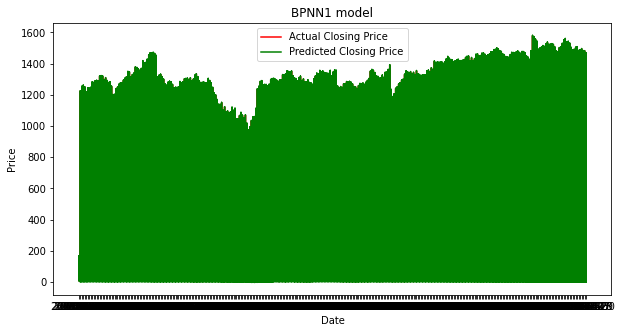

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['date'],trade_dataset['close'], color='r', label='Actual Closing Price')
plt.plot(trade_dataset['date'],trade_dataset['change'], color='g', label='Predicted Closing Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('BPNN1 model')
plt.legend()
plt.show()